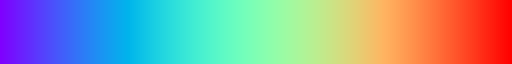

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")  # modern style
plt.rcParams["figure.facecolor"] = "#f5f5f5"

import numpy as np

colors = plt.cm.Set2(np.linspace(0,1,10))  # soft colorful palette

plt.cm.tab10
plt.cm.Paired
plt.cm.Accent
plt.cm.Dark2
plt.cm.rainbow


In [2]:
# -------------------------------------------------
# LOAD DATA
# -------------------------------------------------
file_path = r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\Project_Agri_2_GUVI\agri_cleaned_data.csv"
df = pd.read_csv(file_path)

print("Dataset Loaded:", df.shape)


Dataset Loaded: (16146, 80)


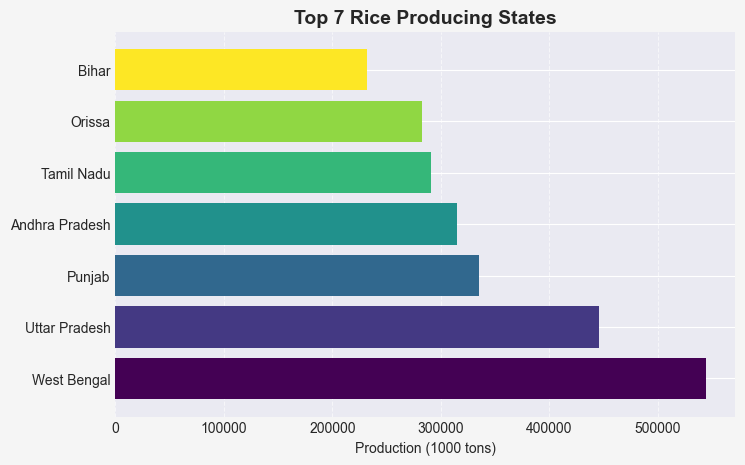

In [4]:
# -------------------------------------------------
# CREATE Top 7 Rice Producing States
# -------------------------------------------------
top_rice = (
    df.groupby("state_name")["rice_production_1000_tons"]
    .sum()
    .sort_values(ascending=False)
    .head(7)
)
# -------------------------------------------------
# 1. Top 7 Rice Producing States
# -------------------------------------------------
plt.figure(figsize=(8,5))
plt.barh(top_rice.index, top_rice.values, color=plt.cm.viridis(np.linspace(0,1,len(top_rice))))
plt.title("Top 7 Rice Producing States", fontsize=14, fontweight="bold")
plt.xlabel("Production (1000 tons)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

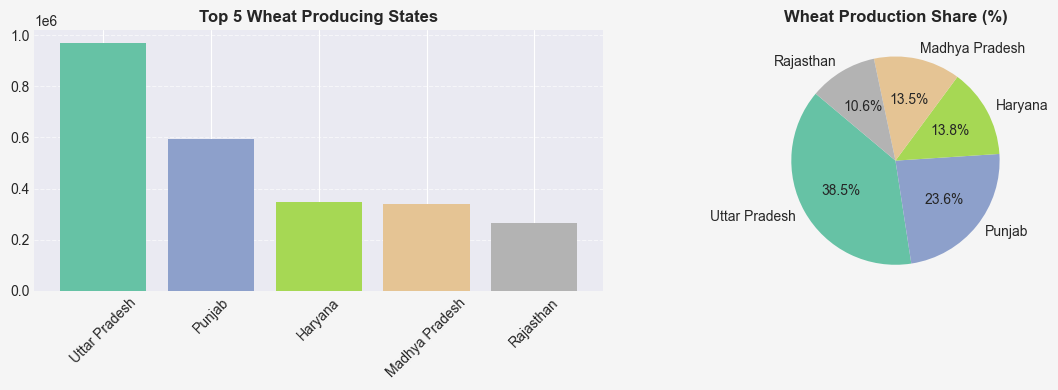

In [6]:
# -------------------------------------------------
# 2. Top 5 Wheat Producing States (Bar + Pie)
# -------------------------------------------------

top_wheat = (
    df.groupby("state_name")["wheat_production_1000_tons"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# Generate 5 distinct colors
wheat_colors = plt.cm.Set2(np.linspace(0,1,len(top_wheat)))

plt.figure(figsize=(12,4))

# ---------------- BAR CHART ----------------
plt.subplot(1,2,1)
plt.bar(top_wheat.index, top_wheat.values, color=wheat_colors)
plt.title("Top 5 Wheat Producing States", fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# ---------------- PIE CHART ----------------
plt.subplot(1,2,2)
plt.pie(
    top_wheat,
    labels=top_wheat.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=wheat_colors
)
plt.title("Wheat Production Share (%)", fontweight="bold")

plt.tight_layout()
plt.show()


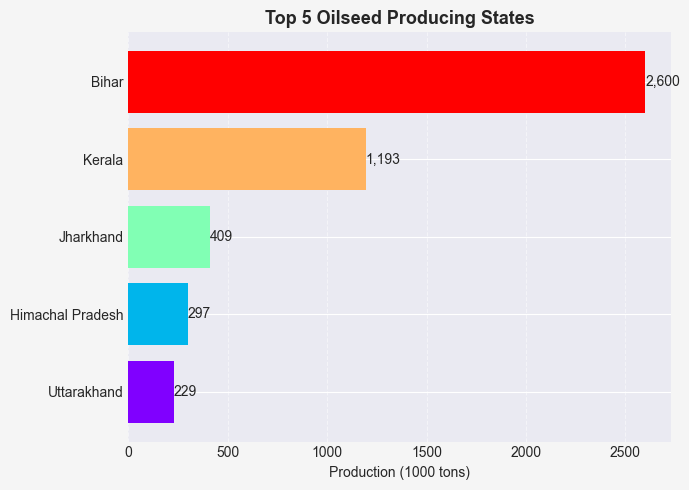

In [9]:
# -------------------------------------------------
# 3. Oilseed Production by Top 5 States
# -------------------------------------------------

oilseed = (
    df.groupby("state_name")["oilseeds_production_1000_tons"]
    .sum()
    .sort_values(ascending=True)
    .head(5)
)

# Generate vibrant colors
oil_colors = plt.cm.rainbow(np.linspace(0,1,len(oilseed)))

plt.figure(figsize=(7,5))

plt.barh(
    oilseed.index,
    oilseed.values,
    color=oil_colors
)

plt.title("Top 5 Oilseed Producing States", fontsize=13, fontweight="bold")
plt.xlabel("Production (1000 tons)")
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Add value labels
for i, value in enumerate(oilseed.values):
    plt.text(value, i, f"{value:,.0f}", va='center')

plt.tight_layout()
plt.show()

C:\Users\Adlin Prince\AppData\Local\Temp\ipykernel_20252\304695916.py:28: UserWarning: Glyph 127803 (\N{SUNFLOWER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Adlin Prince\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127803 (\N{SUNFLOWER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


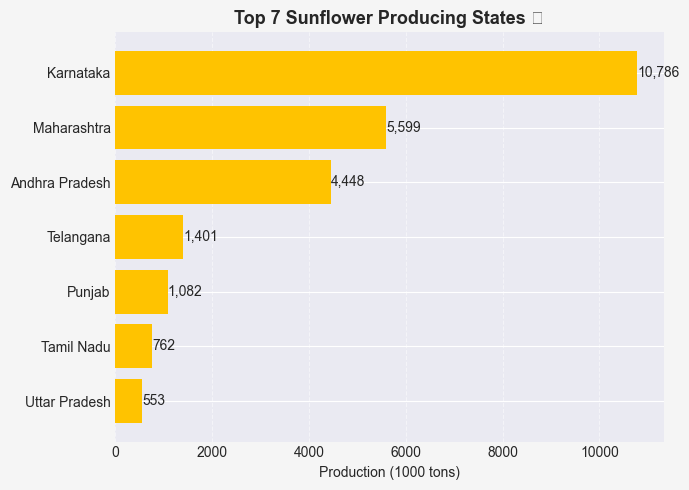

In [13]:
# -------------------------------------------------
# 4. Top 7 Sunflower Producing States
# -------------------------------------------------

sunflower = (
    df.groupby("state_name")["sunflower_production_1000_tons"]
    .sum()
    .sort_values(ascending=True).tail(7)
    .head(7)
)

plt.figure(figsize=(7,5))

plt.barh(
    sunflower.index,
    sunflower.values,
    color="#FFC300"   # Bright Yellow
)

plt.title("Top 7 Sunflower Producing States 🌻", fontsize=13, fontweight="bold")
plt.xlabel("Production (1000 tons)")
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Add value labels
for i, value in enumerate(sunflower.values):
    plt.text(value, i, f"{value:,.0f}", va='center')

plt.tight_layout()
plt.show()

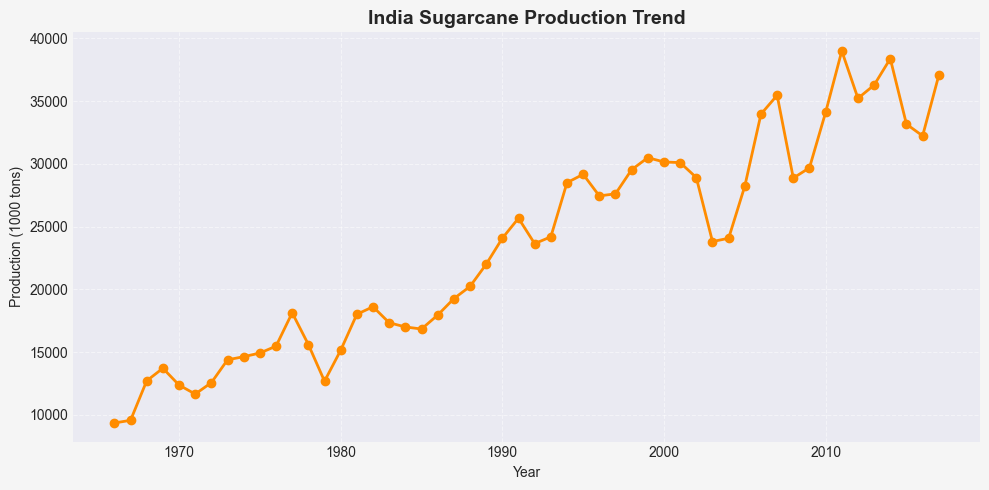

In [14]:
# -------------------------------------------------
# 5. Sugarcane Production Trend (Last 50 Years)
# -------------------------------------------------

sugarcane = (
    df.groupby("year")["sugarcane_production_1000_tons"]
    .sum()
)

plt.figure(figsize=(10,5))

plt.plot(
    sugarcane.index,
    sugarcane.values,
    marker="o",
    color="darkorange",     # Different color applied
    linewidth=2
)

plt.title("India Sugarcane Production Trend", fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.grid(linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

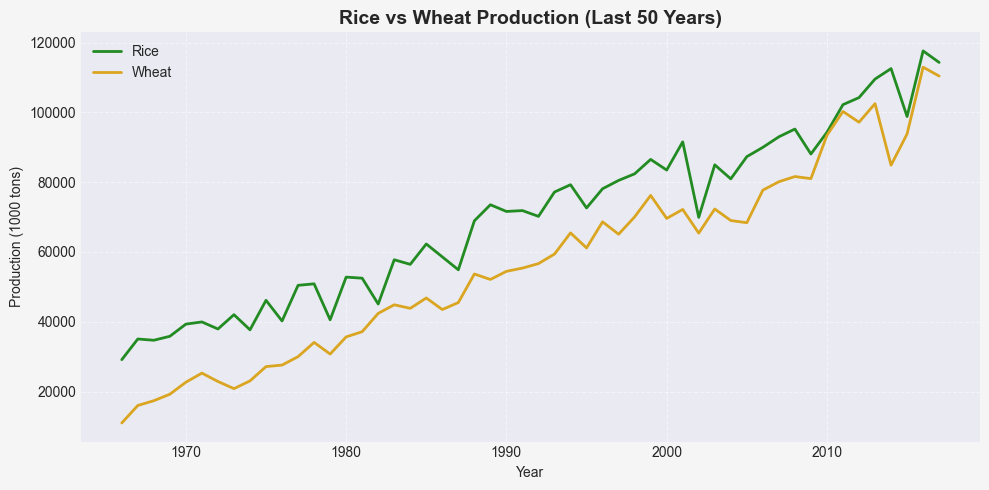

In [15]:
# -------------------------------------------------
# 6. Rice vs Wheat Production (Last 50 Years)
# -------------------------------------------------

yearly = df.groupby("year")[[
    "rice_production_1000_tons",
    "wheat_production_1000_tons"
]].sum()

plt.figure(figsize=(10,5))

plt.plot(
    yearly.index,
    yearly["rice_production_1000_tons"],
    label="Rice",
    color="forestgreen",      # Rice color
    linewidth=2
)

plt.plot(
    yearly.index,
    yearly["wheat_production_1000_tons"],
    label="Wheat",
    color="goldenrod",        # Wheat color
    linewidth=2
)

plt.legend()
plt.title("Rice vs Wheat Production (Last 50 Years)", fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.grid(linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

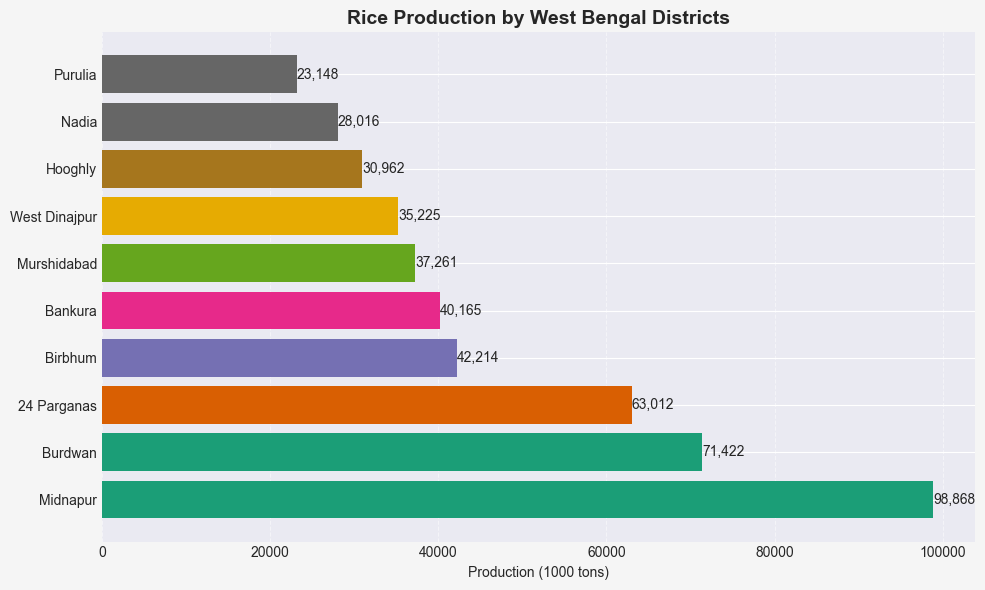

In [16]:
# -------------------------------------------------
# 7. Rice Production by West Bengal Districts
# -------------------------------------------------

wb_rice = (
    df[df["state_name"] == "West Bengal"]
    .groupby("dist_name")["rice_production_1000_tons"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Generate vibrant gradient colors
wb_colors = plt.cm.Dark2(np.linspace(0,1,len(wb_rice)))

plt.figure(figsize=(10,6))

plt.barh(
    wb_rice.index,
    wb_rice.values,
    color=wb_colors
)

plt.title("Rice Production by West Bengal Districts", fontsize=14, fontweight="bold")
plt.xlabel("Production (1000 tons)")
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Add value labels
for i, value in enumerate(wb_rice.values):
    plt.text(value, i, f"{value:,.0f}", va='center')

plt.tight_layout()
plt.show()

C:\Users\Adlin Prince\AppData\Local\Temp\ipykernel_20252\336433011.py:35: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Adlin Prince\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


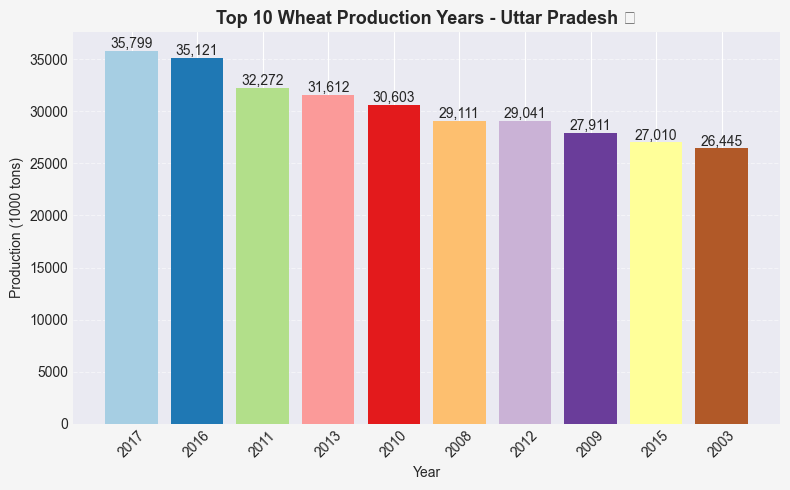

In [17]:
# -------------------------------------------------
# 8. Top 10 Wheat Production Years (Uttar Pradesh)
# -------------------------------------------------

up_wheat = (
    df[df["state_name"] == "Uttar Pradesh"]
    .groupby("year")["wheat_production_1000_tons"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Generate colorful palette
up_colors = plt.cm.Paired(np.linspace(0,1,len(up_wheat)))

plt.figure(figsize=(8,5))

plt.bar(
    up_wheat.index.astype(str),
    up_wheat.values,
    color=up_colors
)

plt.title("Top 10 Wheat Production Years - Uttar Pradesh 🌾",
          fontsize=13, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add value labels
for i, value in enumerate(up_wheat.values):
    plt.text(i, value, f"{value:,.0f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

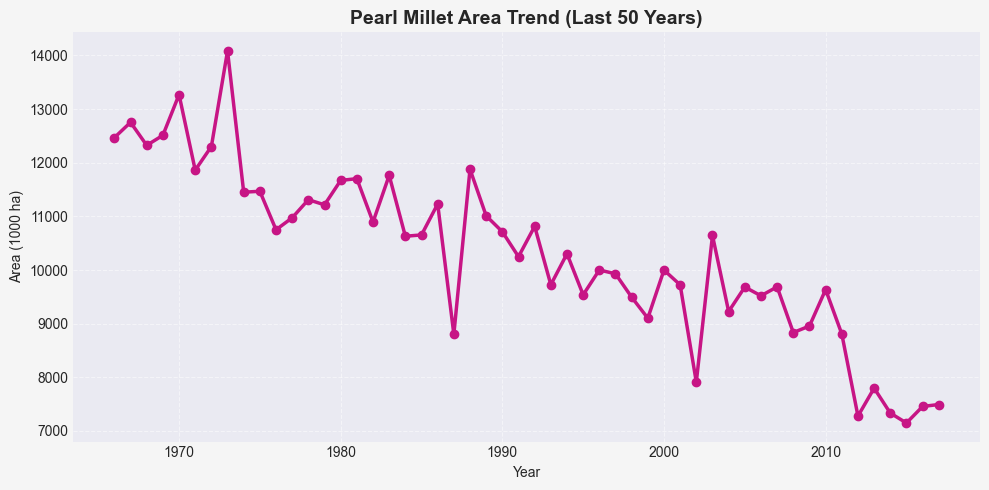

In [18]:
# -------------------------------------------------
# 9. Millet Production Trend (Last 50 Years)
# -------------------------------------------------

millet = (
    df.groupby("year")["pearl_millet_area_1000_ha"]
    .sum()
)

plt.figure(figsize=(10,5))

plt.plot(
    millet.index,
    millet.values,
    color="mediumvioletred",   # Different vibrant color
    linewidth=2.5,
    marker="o"
)

plt.title("Pearl Millet Area Trend (Last 50 Years)", 
          fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Area (1000 ha)")
plt.grid(linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

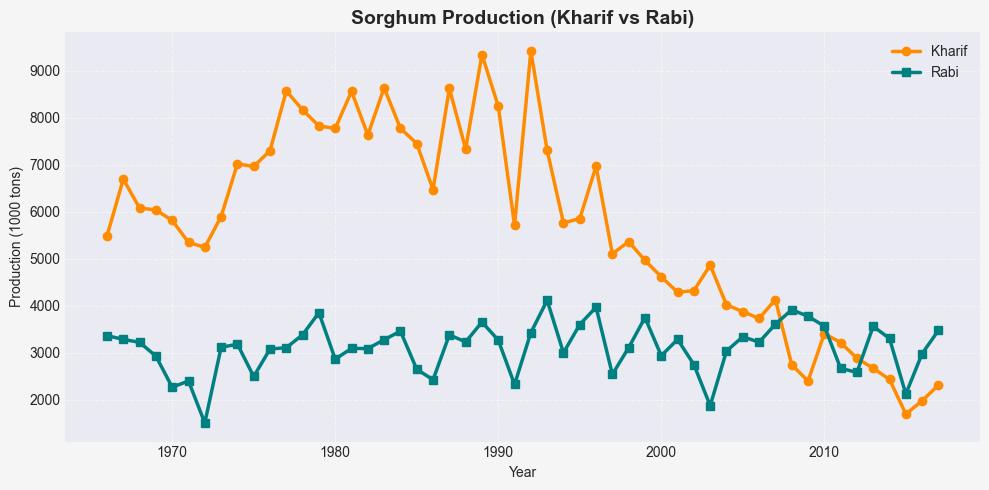

In [19]:
# -------------------------------------------------
# 10. Sorghum Production (Kharif vs Rabi)
# -------------------------------------------------

sorghum = df.groupby("year")[[
    "kharif_sorghum_production_1000_tons",
    "rabi_sorghum_production_1000_tons"
]].sum()

plt.figure(figsize=(10,5))

plt.plot(
    sorghum.index,
    sorghum["kharif_sorghum_production_1000_tons"],
    label="Kharif",
    color="darkorange",
    linewidth=2.5,
    marker="o"
)

plt.plot(
    sorghum.index,
    sorghum["rabi_sorghum_production_1000_tons"],
    label="Rabi",
    color="teal",
    linewidth=2.5,
    marker="s"
)

plt.legend()
plt.title("Sorghum Production (Kharif vs Rabi)",
          fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.grid(linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

C:\Users\Adlin Prince\AppData\Local\Temp\ipykernel_20252\1692836641.py:32: UserWarning: Glyph 129372 (\N{PEANUTS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Adlin Prince\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129372 (\N{PEANUTS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


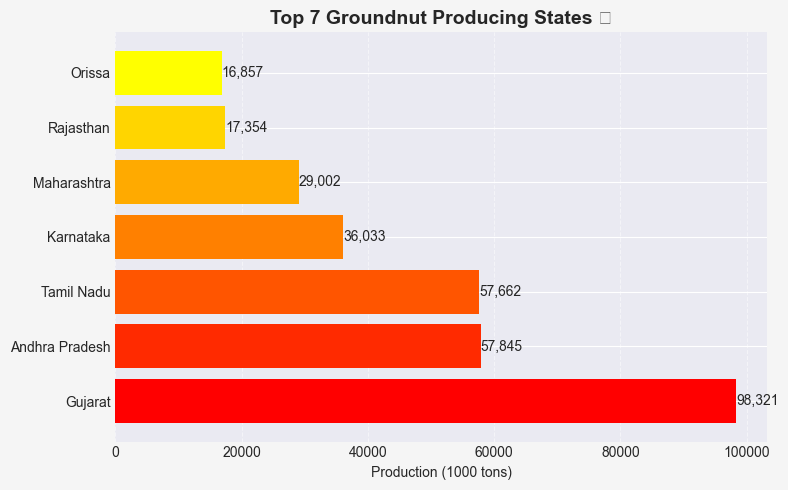

In [20]:
# -------------------------------------------------
# 11. Top 7 Groundnut Producing States
# -------------------------------------------------

groundnut = (
    df.groupby("state_name")["groundnut_production_1000_tons"]
    .sum()
    .sort_values(ascending=False)
    .head(7)
)

# Generate warm earthy colors (groundnut theme)
groundnut_colors = plt.cm.autumn(np.linspace(0,1,len(groundnut)))

plt.figure(figsize=(8,5))

plt.barh(
    groundnut.index,
    groundnut.values,
    color=groundnut_colors
)

plt.title("Top 7 Groundnut Producing States 🥜",
          fontsize=14, fontweight="bold")
plt.xlabel("Production (1000 tons)")
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Add value labels
for i, value in enumerate(groundnut.values):
    plt.text(value, i, f"{value:,.0f}", va="center")

plt.tight_layout()
plt.show()

C:\Users\Adlin Prince\AppData\Local\Temp\ipykernel_20252\4050907764.py:34: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Adlin Prince\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


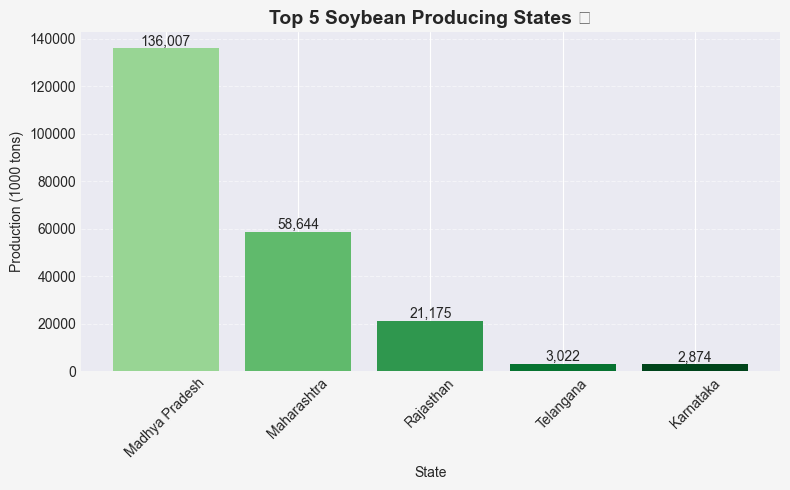

In [21]:
# -------------------------------------------------
# 12. Soybean Production (Top 5 States)
# -------------------------------------------------

soy = (
    df.groupby("state_name")["soyabean_production_1000_tons"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# Green gradient theme (soybean crop feel 🌱)
soy_colors = plt.cm.Greens(np.linspace(0.4, 1, len(soy)))

plt.figure(figsize=(8,5))

plt.bar(
    soy.index,
    soy.values,
    color=soy_colors
)

plt.title("Top 5 Soybean Producing States 🌱",
          fontsize=14, fontweight="bold")
plt.xlabel("State")
plt.ylabel("Production (1000 tons)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add value labels
for i, value in enumerate(soy.values):
    plt.text(i, value, f"{value:,.0f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

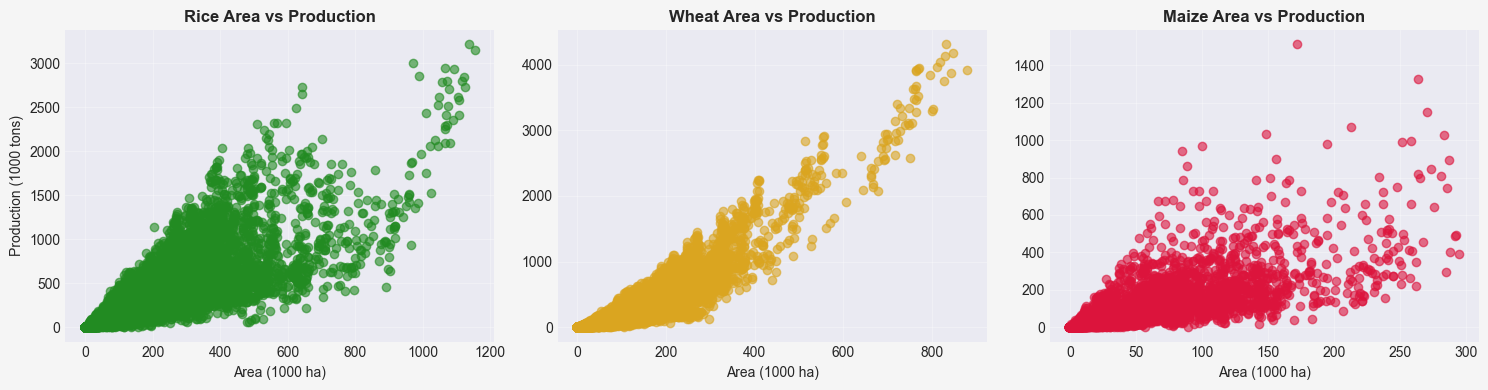

In [22]:
# -------------------------------------------------
# 13. Impact of Area on Production (Rice, Wheat, Maize)
# -------------------------------------------------

plt.figure(figsize=(15,4))

# ---------------- Rice ----------------
plt.subplot(1,3,1)
plt.scatter(
    df["rice_area_1000_ha"],
    df["rice_production_1000_tons"],
    color="forestgreen",
    alpha=0.6
)
plt.title("Rice Area vs Production", fontweight="bold")
plt.xlabel("Area (1000 ha)")
plt.ylabel("Production (1000 tons)")
plt.grid(alpha=0.3)

# ---------------- Wheat ----------------
plt.subplot(1,3,2)
plt.scatter(
    df["wheat_area_1000_ha"],
    df["wheat_production_1000_tons"],
    color="goldenrod",
    alpha=0.6
)
plt.title("Wheat Area vs Production", fontweight="bold")
plt.xlabel("Area (1000 ha)")
plt.grid(alpha=0.3)

# ---------------- Maize ----------------
plt.subplot(1,3,3)
plt.scatter(
    df["maize_area_1000_ha"],
    df["maize_production_1000_tons"],
    color="crimson",
    alpha=0.6
)
plt.title("Maize Area vs Production", fontweight="bold")
plt.xlabel("Area (1000 ha)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

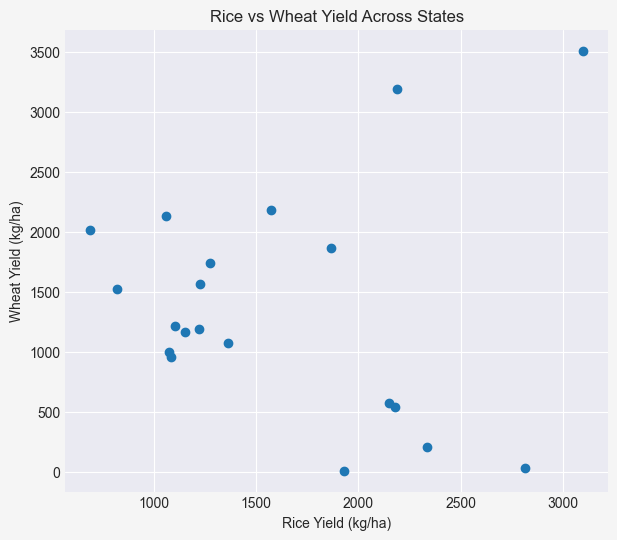

In [23]:

# -------------------------------------------------
# 14. Rice vs Wheat Yield Across States
# -------------------------------------------------
yield_data = df.groupby("state_name")[["rice_yield_kg_per_ha","wheat_yield_kg_per_ha"]].mean().dropna()

plt.figure(figsize=(7,6))
plt.scatter(yield_data["rice_yield_kg_per_ha"], yield_data["wheat_yield_kg_per_ha"])
plt.xlabel("Rice Yield (kg/ha)")
plt.ylabel("Wheat Yield (kg/ha)")
plt.title("Rice vs Wheat Yield Across States")
plt.show()

C:\Users\Adlin Prince\AppData\Local\Temp\ipykernel_20252\1913928899.py:30: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Adlin Prince\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


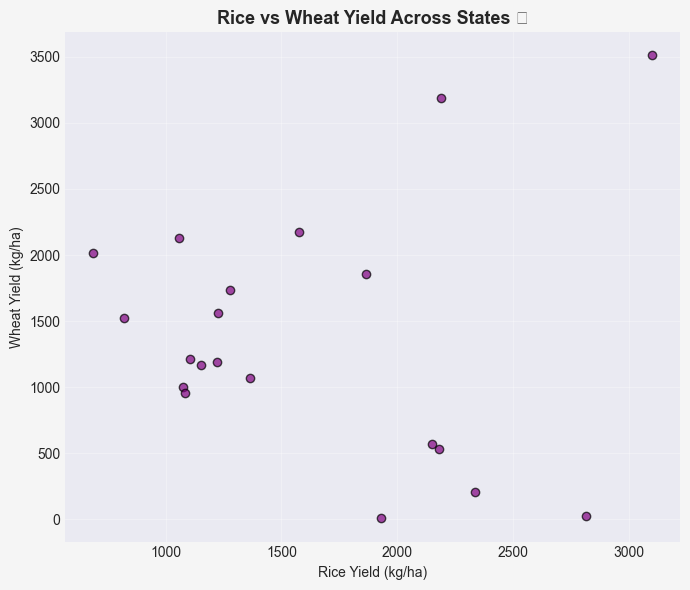

In [24]:
# -------------------------------------------------
# 14. Rice vs Wheat Yield Across States
# -------------------------------------------------

yield_data = (
    df.groupby("state_name")[[
        "rice_yield_kg_per_ha",
        "wheat_yield_kg_per_ha"
    ]]
    .mean()
    .dropna()
)

plt.figure(figsize=(7,6))

plt.scatter(
    yield_data["rice_yield_kg_per_ha"],
    yield_data["wheat_yield_kg_per_ha"],
    color="purple",
    alpha=0.7,
    edgecolors="black"
)

plt.xlabel("Rice Yield (kg/ha)")
plt.ylabel("Wheat Yield (kg/ha)")
plt.title("Rice vs Wheat Yield Across States 🌾",
          fontsize=13, fontweight="bold")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()